In [41]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [42]:
# densities (g/cm^3)
rho_cd = 8.65
rho_zn = 7.14
rho_te = 6.24
rho_si = 2.32
rho_czt = rho_cd * 0.45 + rho_zn * 0.05 + rho_te * 0.5

# length (cm)
l_czt_1 = 0.8 / 10 # mm to cm
l_czt_2 = 2.0 / 10 # mm to cm
l_si_1 = 60 / 10000 # micron to cm
l_si_2 = 280 /  10000 # micron to cm


In [43]:
data_czt = pd.read_csv('data/CZT.tsv', sep='\t')
data_czt

,Photon Energy,Tot. w/ Coherent
0,0.001000,7603.00000
1,0.001003,7553.00000
2,0.001006,7505.00000
3,0.001006,7682.00000
4,0.001013,7567.00000
...,...,...
67,6.000000,0.03528
68,7.000000,0.03587
69,8.000000,0.03659
70,9.000000,0.03739


In [44]:
data_si = pd.read_csv('data/Si.tsv', sep='\t')
data_si

,Photon Energy,Tot. w/ Coherent
0,0.001000,1570.00000
1,0.001500,535.60000
2,0.001839,309.20000
3,0.001839,3193.00000
4,0.002000,2777.00000
5,0.003000,978.40000
6,0.004000,452.80000
7,0.005000,245.10000
8,0.006000,147.00000
9,0.008000,64.69000


In [45]:
x_czt = data_czt['Photon Energy'].to_numpy()
y_czt = data_czt['Tot. w/ Coherent'].to_numpy()

# detection efficiency
y_czt_1 = 1 - np.exp(-y_czt * rho_czt * l_czt_1)
y_czt_2 = 1 - np.exp(-y_czt * rho_czt * l_czt_2)

# define plot range
e_min_czt = np.min(x_czt)
e_max_czt = np.max(x_czt)
x_interp_czt = np.arange(e_min_czt, e_max_czt)

# interpolation
f_czt_1 = interp1d(x_czt, y_czt_1)
f_czt_2 = interp1d(x_czt, y_czt_2)

# interpolated detection efficiency
y_czt_interp_1 = f_czt_1(x_interp_czt)
y_czt_interp_2 = f_czt_2(x_interp_czt)


In [46]:
x_si = data_si['Photon Energy'].to_numpy()
y_si = data_si['Tot. w/ Coherent'].to_numpy()

# detection efficiency
y_si_1 = 1 - np.exp(-y_si * rho_si * l_si_1)
y_si_2 = 1 - np.exp(-y_si * rho_si * l_si_2)

# define plot range
e_min_si = np.min(x_si)
e_max_si = np.max(x_si)
x_interp_si = np.arange(e_min_si, e_max_si)

# interpolation
f_si_1 = interp1d(x_si, y_si_1)
f_si_2 = interp1d(x_si, y_si_2)

# interpolated detection efficiency
y_si_interp_1 = f_si_1(x_interp_si)
y_si_interp_2 = f_si_2(x_interp_si)

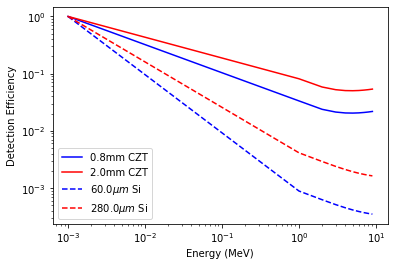

In [51]:
# plot
plt.loglog(x_interp_czt, y_czt_interp_1, 'b-', label='0.8mm CZT')
plt.loglog(x_interp_czt, y_czt_interp_2, 'r-', label='2.0mm CZT')
plt.loglog(x_interp_si, y_si_interp_1, 'b--', label=r'$60.0\mu m$ Si')
plt.loglog(x_interp_si, y_si_interp_2, 'r--', label=r'$280.0\mu m$ Si')
plt.xlabel('Energy (MeV)')
plt.ylabel('Detection Efficiency')
plt.legend()
plt.show()
